<a href="https://colab.research.google.com/github/NeerajaSuresh888/Market-Segmentation-Analysis/blob/main/segmentation_on_agricultural_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')



In [7]:
df = pd.read_csv("/content/adriculture dataset",
names=['State', 'District', 'Market', 'Commodity', 'Variety', 'Date', 'Min_Price', 'Max_Price', 'Modal_Price'])


In [8]:
# Clean the data - remove any malformed rows
df = df.dropna(subset=['State', 'District', 'Market', 'Commodity'])

In [9]:
# Convert price columns to numeric
price_columns = ['Min_Price', 'Max_Price', 'Modal_Price']
for col in price_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
# Remove rows with invalid prices
df = df.dropna(subset=price_columns)

In [11]:
# Convert date column
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [12]:
# Display basic information about the dataset
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
Shape: (2238, 9)
Columns: ['State', 'District', 'Market', 'Commodity', 'Variety', 'Date', 'Min_Price', 'Max_Price', 'Modal_Price']

First 5 rows:
                 State       District      Market              Commodity  \
1  Andaman and Nicobar  South Andaman  Port Blair             Amaranthus   
2  Andaman and Nicobar  South Andaman  Port Blair         Banana - Green   
3  Andaman and Nicobar  South Andaman  Port Blair  Bhindi(Ladies Finger)   
4  Andaman and Nicobar  South Andaman  Port Blair           Bitter gourd   
5  Andaman and Nicobar  South Andaman  Port Blair           Black pepper   

          Variety       Date  Min_Price  Max_Price  Modal_Price  
1      Amaranthus 2019-03-04     6000.0     8000.0       7000.0  
2  Banana - Green 2019-03-04     4500.0     5500.0       5000.0  
3          Bhindi 2019-03-04     6000.0     8000.0       7000.0  
4           Other 2019-03-04     6000.0     8000.0       7000.0  
5           Other 2019-03-04   110000.0   130000.0   

In [19]:
# Data preprocessing and exploration
print("\n" + "="*60)
print("GEOGRAPHIC AND PRICING ANALYSIS")
print("="*60)
# Geographic and pricing columns identification
geographic_cols = ['State', 'District', 'Market']
pricing_cols = ['Min_Price', 'Max_Price', 'Modal_Price']
commodity_cols = ['Commodity', 'Variety']

print(f"Geographic columns: {geographic_cols}")
print(f"Pricing columns: {pricing_cols}")
print(f"Commodity columns: {commodity_cols}")

# Check for missing values
print(f"\nMissing values analysis:")
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} ({missing_count/len(df)*100:.1f}%)")
# Create additional features
df['Price_Range'] = df['Max_Price'] - df['Min_Price']
df['Price_Volatility'] = df['Price_Range'] / df['Modal_Price'] * 100


GEOGRAPHIC AND PRICING ANALYSIS
Geographic columns: ['State', 'District', 'Market']
Pricing columns: ['Min_Price', 'Max_Price', 'Modal_Price']
Commodity columns: ['Commodity', 'Variety']

Missing values analysis:


In [21]:
# ===== GEOGRAPHIC SEGMENTATION ANALYSIS =====

print("\n" + "="*50)
print("GEOGRAPHIC SEGMENTATION ANALYSIS")
print("="*50)
# State-wise analysis
print(f"\nState Distribution:")
state_distribution = df['State'].value_counts()
print(state_distribution)

# District-wise analysis
print(f"\nTop 10 Districts by record count:")
district_distribution = df['District'].value_counts()
print(district_distribution.head(10))

# Market-wise analysis
print(f"\nTop 10 Markets by record count:")
market_distribution = df['Market'].value_counts()
print(market_distribution.head(10))



GEOGRAPHIC SEGMENTATION ANALYSIS

State Distribution:
State
Uttar Pradesh          574
Kerala                 274
Tamil Nadu             183
Punjab                 180
Maharashtra            162
West Bengal            162
Gujarat                113
Himachal Pradesh       102
Odisha                  86
Haryana                 65
Assam                   58
Manipur                 52
Madhya Pradesh          44
Rajasthan               41
Karnataka               36
Uttrakhand              21
Tripura                 18
Andaman and Nicobar     15
Telangana               15
Pondicherry              7
Andhra Pradesh           7
Meghalaya                6
Nagaland                 6
Chattisgarh              5
Jammu and Kashmir        3
Goa                      3
Name: count, dtype: int64

Top 10 Districts by record count:
District
Agra             123
Pune              89
Saharanpur        79
Kangra            75
Thirssur          71
Villupuram        67
Burdwan           57
Muzaffarnagar     49

In [23]:
# Create geographic segments based on state and district combinations
df['Geographic_Region'] = df['State'] + ' - ' + df['District']
df['Geographic_Segment'] = df['Geographic_Region'].apply(
    lambda x: 'High Activity' if df['Geographic_Region'].value_counts()[x] > df['Geographic_Region'].value_counts().quantile(0.75)
    else 'Medium Activity' if df['Geographic_Region'].value_counts()[x] > df['Geographic_Region'].value_counts().quantile(0.25)
    else 'Low Activity'
)


<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

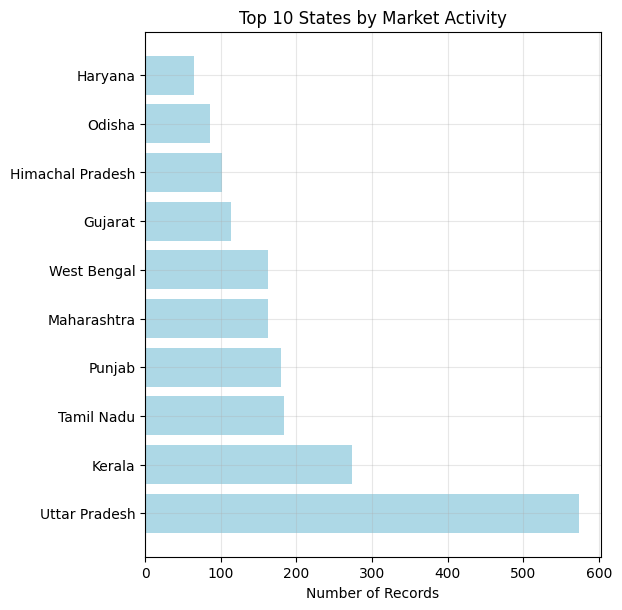

In [24]:
plt.figure(figsize=(20, 15))
# Top states by count
plt.subplot(2, 3, 1)
top_states = df['State'].value_counts().head(10)
plt.barh(range(len(top_states)), top_states.values, color='lightblue')
plt.yticks(range(len(top_states)), top_states.index)
plt.xlabel('Number of Records')
plt.title('Top 10 States by Market Activity')
plt.grid(True, alpha=0.3)

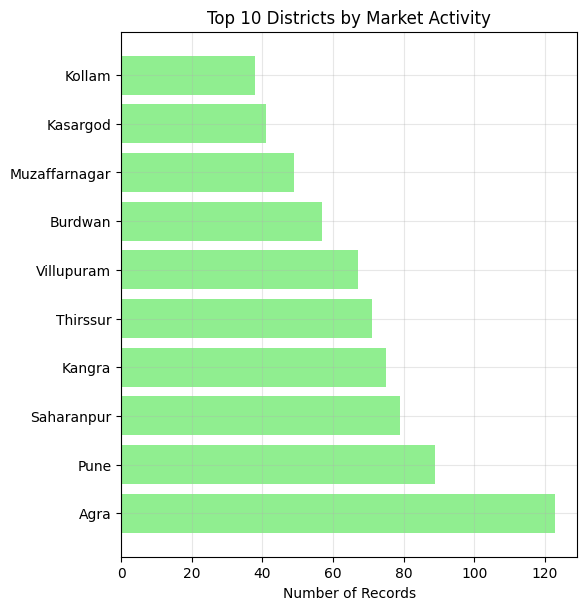

In [27]:
plt.figure(figsize=(20, 15))
# Top districts by count
plt.subplot(2, 3, 2)
top_districts = df['District'].value_counts().head(10)
plt.barh(range(len(top_districts)), top_districts.values, color='lightgreen')
plt.yticks(range(len(top_districts)), top_districts.index)
plt.xlabel('Number of Records')
plt.title('Top 10 Districts by Market Activity')
plt.grid(True, alpha=0.3)

Text(0.5, 1.0, 'Geographic Segment Distribution')

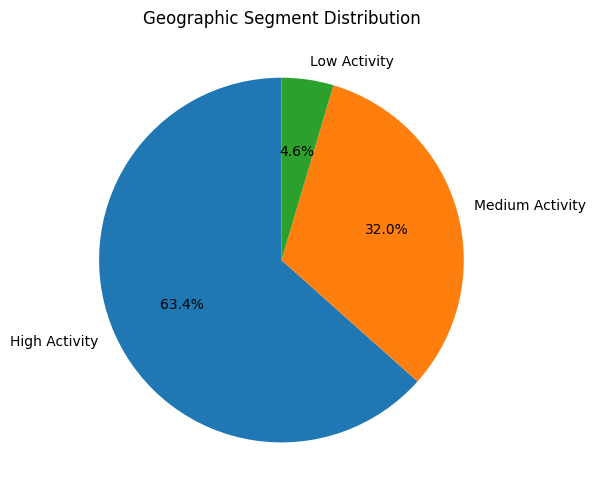

In [28]:
plt.figure(figsize=(20, 15))
# Geographic segment distribution
plt.subplot(2, 3, 3)
geo_segment_counts = df['Geographic_Segment'].value_counts()
plt.pie(geo_segment_counts.values, labels=geo_segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Geographic Segment Distribution')

In [29]:
# ===== PRICING ANALYSIS =====

print("\n" + "="*50)
print("PRICING ANALYSIS")
print("="*50)

# Price statistics
print(f"\nModal Price Statistics:")
print(df['Modal_Price'].describe())

print(f"\nPrice Range Statistics:")
print(df['Price_Range'].describe())

print(f"\nPrice Volatility Statistics:")
print(df['Price_Volatility'].describe())

# Create price segments based on modal price quartiles
q1 = df['Modal_Price'].quantile(0.25)
q2 = df['Modal_Price'].quantile(0.50)
q3 = df['Modal_Price'].quantile(0.75)

def categorize_price(price):
    if pd.isna(price):
        return "Unknown"
    if price <= q1:
        return "Budget (Low)"
    elif price <= q2:
        return "Economy (Medium-Low)"
    elif price <= q3:
        return "Premium (Medium-High)"
    else:
        return "Luxury (High)"

df['Price_Segment'] = df['Modal_Price'].apply(categorize_price)



PRICING ANALYSIS

Modal Price Statistics:
count      2238.000000
mean       2698.865952
std        3694.830905
min           2.000000
25%         950.000000
50%        1831.500000
75%        3500.000000
max      120000.000000
Name: Modal_Price, dtype: float64

Price Range Statistics:
count     2238.000000
mean       399.659964
std        937.012908
min      -5000.000000
25%        100.000000
50%        200.000000
75%        400.000000
max      20000.000000
Name: Price_Range, dtype: float64

Price Volatility Statistics:
count    2238.000000
mean       18.911256
std        25.229582
min       -93.333333
25%         4.285714
50%        11.111111
75%        23.076923
max       260.000000
Name: Price_Volatility, dtype: float64


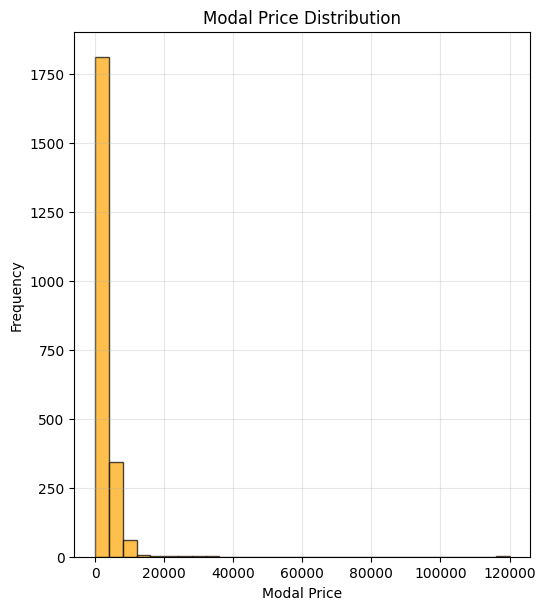

In [53]:
plt.figure(figsize=(20, 15))
# Price distribution visualization
plt.subplot(2, 3, 4)
plt.hist(df['Modal_Price'], bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Modal Price')
plt.ylabel('Frequency')
plt.title('Modal Price Distribution')
plt.grid(True, alpha=0.3)

Text(0.5, 1.0, 'Price Segment Distribution')

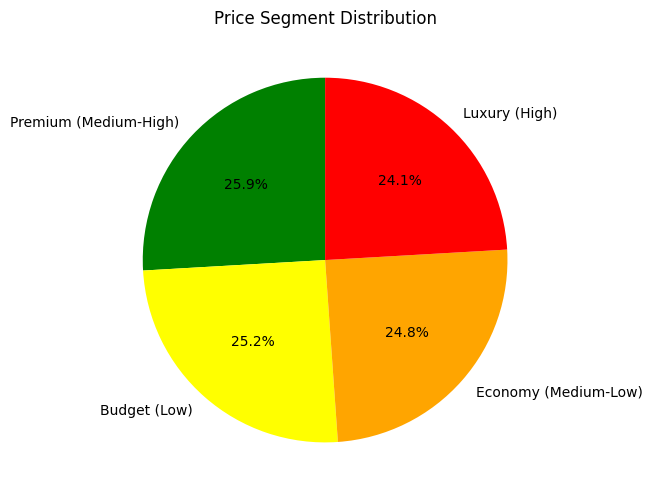

In [54]:
plt.figure(figsize=(20, 15))
# Price segments distribution
plt.subplot(2, 3, 5)
price_segment_counts = df['Price_Segment'].value_counts()
colors = ['green', 'yellow', 'orange', 'red']
plt.pie(price_segment_counts.values, labels=price_segment_counts.index,
        autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Price Segment Distribution')

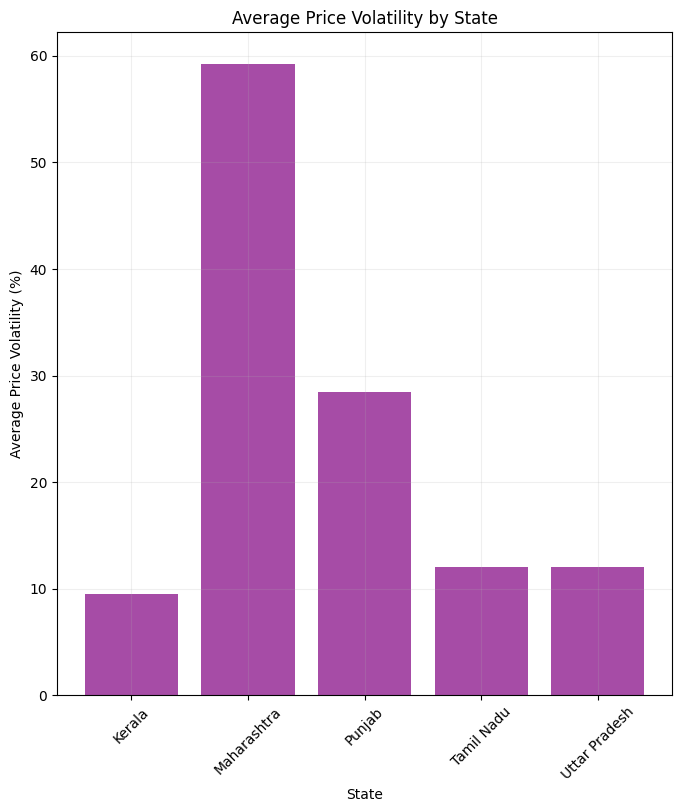

In [64]:
plt.figure(figsize=(20, 15))
# Price volatility by state
plt.subplot(2, 3, 6)
top_states_for_volatility = df['State'].value_counts().head(5).index
state_volatility = df[df['State'].isin(top_states_for_volatility)].groupby('State')['Price_Volatility'].mean()
plt.bar(state_volatility.index, state_volatility.values, color='purple', alpha=0.7)
plt.xlabel('State')
plt.ylabel('Average Price Volatility (%)')
plt.title('Average Price Volatility by State')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

In [33]:
# ===== GEOGRAPHIC vs PRICING ANALYSIS =====

print("\n" + "="*50)
print("GEOGRAPHIC vs PRICING CROSS-ANALYSIS")
print("="*50)

# State-wise price analysis
state_price_analysis = df.groupby('State').agg({
    'Modal_Price': ['mean', 'median', 'std', 'count'],
    'Price_Volatility': 'mean'
}).round(2)

print("\nState-wise Price Analysis:")
print(state_price_analysis)

# District-wise price analysis (top 10 districts)
top_districts = df['District'].value_counts().head(10).index
district_price_analysis = df[df['District'].isin(top_districts)].groupby('District').agg({
    'Modal_Price': ['mean', 'median', 'std', 'count'],
    'Price_Volatility': 'mean'
}).round(2)

print("\nTop Districts Price Analysis:")
print(district_price_analysis)

# Commodity-wise analysis
commodity_analysis = df.groupby('Commodity').agg({
    'Modal_Price': ['mean', 'median', 'count'],
    'Price_Volatility': 'mean'
}).round(2)

print("\nTop Commodities by Price:")
print(commodity_analysis.sort_values(('Modal_Price', 'mean'), ascending=False).head(10))




GEOGRAPHIC vs PRICING CROSS-ANALYSIS

State-wise Price Analysis:
                    Modal_Price                          Price_Volatility
                           mean   median       std count             mean
State                                                                    
Andaman and Nicobar    14073.33   7000.0  29397.80    15            25.61
Andhra Pradesh          1698.57   1760.0   1444.88     7            43.37
Assam                   2571.90   2225.0   1832.87    58            19.16
Chattisgarh             2720.00   1500.0   1688.79     5             1.95
Goa                    20750.00  20500.0   1391.94     3             5.58
Gujarat                 2335.65   1850.0   1437.67   113            30.44
Haryana                 2227.71   1500.0   1923.82    65            21.26
Himachal Pradesh        3410.49   2500.0   2875.92   102            10.79
Jammu and Kashmir       1216.67   1250.0    401.04     3            15.17
Karnataka               2469.92   1775.0   171

In [34]:
# ===== K-MEANS CLUSTERING FOR MARKET SEGMENTATION =====

print("\n" + "="*50)
print("K-MEANS CLUSTERING ANALYSIS")
print("="*50)

# Prepare features for clustering
clustering_features = ['Modal_Price', 'Price_Range', 'Price_Volatility']

# Create additional features for clustering
df['State_Encoded'] = pd.Categorical(df['State']).codes
df['District_Encoded'] = pd.Categorical(df['District']).codes
df['Commodity_Encoded'] = pd.Categorical(df['Commodity']).codes

# Add encoded features to clustering
clustering_features.extend(['State_Encoded', 'District_Encoded', 'Commodity_Encoded'])

print(f"Features selected for clustering: {clustering_features}")

X = df[clustering_features].copy()

# Handle any remaining missing values
X = X.fillna(X.mean())

print(f"\nFeature Statistics for Clustering:")
print(X.describe())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method for optimal number of clusters
inertia = []
silhouette_scores = []
k_range = range(2, min(11, len(X)//10))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))



K-MEANS CLUSTERING ANALYSIS
Features selected for clustering: ['Modal_Price', 'Price_Range', 'Price_Volatility', 'State_Encoded', 'District_Encoded', 'Commodity_Encoded']

Feature Statistics for Clustering:
         Modal_Price   Price_Range  Price_Volatility  State_Encoded  \
count    2238.000000   2238.000000       2238.000000    2238.000000   
mean     2698.865952    399.659964         18.911256      16.008043   
std      3694.830905    937.012908         25.229582       7.016930   
min         2.000000  -5000.000000        -93.333333       0.000000   
25%       950.000000    100.000000          4.285714      10.000000   
50%      1831.500000    200.000000         11.111111      18.000000   
75%      3500.000000    400.000000         23.076923      23.000000   
max    120000.000000  20000.000000        260.000000      25.000000   

       District_Encoded  Commodity_Encoded  
count       2238.000000        2238.000000  
mean          90.187668          71.593834  
std           52.

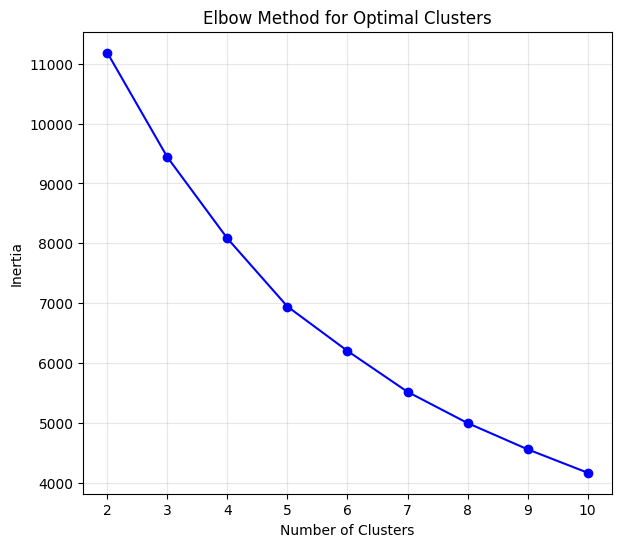

In [35]:
# Plot elbow method and silhouette scores
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True, alpha=0.3)

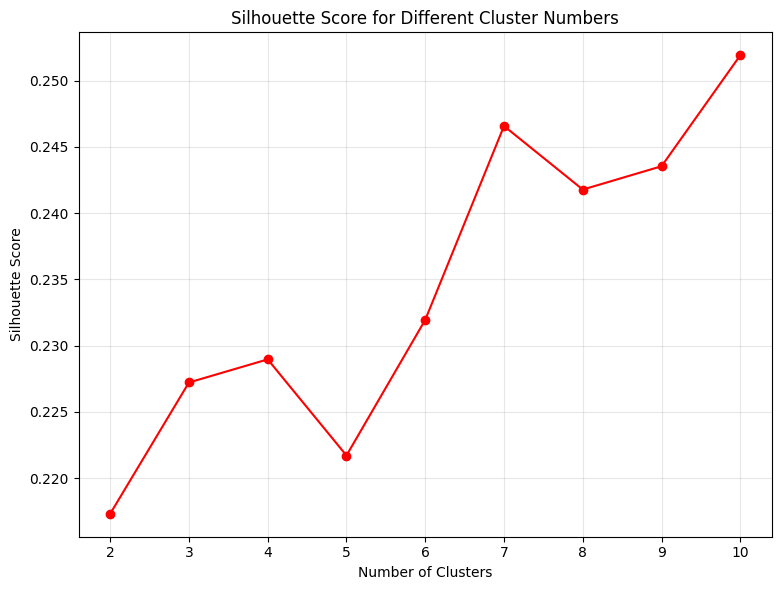

In [52]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [37]:
# Choose optimal number of clusters
optimal_k = k_range[np.argmax(silhouette_scores)]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Market_Cluster'] = kmeans.fit_predict(X_scaled)

print(f"\nOptimal number of clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_scaled, df['Market_Cluster']):.3f}")

# Display cluster distribution
print("\nCluster Distribution:")
print(df['Market_Cluster'].value_counts().sort_index())


Optimal number of clusters: 10
Silhouette Score: 0.252

Cluster Distribution:
Market_Cluster
0    373
1    322
2      1
3    390
4    332
5     21
6    126
7    278
8     79
9    316
Name: count, dtype: int64


In [38]:
# ===== CLUSTER ANALYSIS =====

print("\n" + "="*50)
print("DETAILED CLUSTER ANALYSIS")
print("="*50)

# Analyze clusters
cluster_analysis = df.groupby('Market_Cluster')[['Modal_Price', 'Price_Range', 'Price_Volatility']].agg(['mean', 'std', 'min', 'max']).round(2)

print("\nCluster Analysis Summary:")
print(cluster_analysis)

# Cluster characteristics
for cluster in range(optimal_k):
    cluster_data = df[df['Market_Cluster'] == cluster]
    print(f"\n**CLUSTER {cluster} PROFILE:")
    print(f"   Size: {len(cluster_data)} records ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"   Average Modal Price: ₹{cluster_data['Modal_Price'].mean():.2f}")
    print(f"   Average Price Range: ₹{cluster_data['Price_Range'].mean():.2f}")
    print(f"   Average Price Volatility: {cluster_data['Price_Volatility'].mean():.2f}%")
    print(f"   Most Common State: {cluster_data['State'].mode().iloc[0] if len(cluster_data['State'].mode()) > 0 else 'N/A'}")
    print(f"   Most Common District: {cluster_data['District'].mode().iloc[0] if len(cluster_data['District'].mode()) > 0 else 'N/A'}")
    print(f"   Most Common Commodity: {cluster_data['Commodity'].mode().iloc[0] if len(cluster_data['Commodity'].mode()) > 0 else 'N/A'}")



DETAILED CLUSTER ANALYSIS

Cluster Analysis Summary:
               Modal_Price                              Price_Range           \
                      mean      std       min       max        mean      std   
Market_Cluster                                                                 
0                  2699.11  1885.51       2.0    7730.0      300.04   331.51   
1                  2339.98  1901.12     390.0   10275.0      208.34   210.78   
2                120000.00      NaN  120000.0  120000.0    20000.00      NaN   
3                  2108.18  1882.58     220.0   10530.0      153.86   191.15   
4                  3050.95  1771.57     350.0    8200.0      364.37   331.34   
5                  7593.81  5340.65    2000.0   26500.0     6948.10  1928.22   
6                  1568.67  1368.47       2.0    6000.0     1246.33   957.13   
7                  1988.85  1294.46       2.0    7500.0      228.27   543.91   
8                 11408.09  5798.12    5000.0   32500.0     1241.0

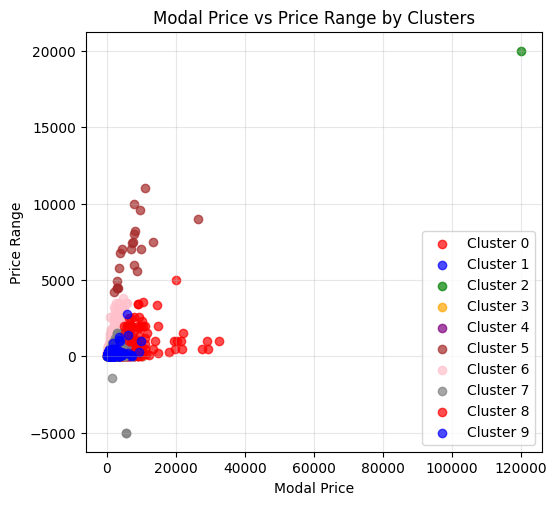

In [39]:
plt.figure(figsize=(20, 12))

# Price vs Price Range by clusters
plt.subplot(2, 3, 1)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
for i in range(optimal_k):
    cluster_data = df[df['Market_Cluster'] == i]
    plt.scatter(cluster_data['Modal_Price'], cluster_data['Price_Range'],
               c=colors[i % len(colors)], label=f'Cluster {i}', alpha=0.7)
plt.xlabel('Modal Price')
plt.ylabel('Price Range')
plt.title('Modal Price vs Price Range by Clusters')
plt.legend()
plt.grid(True, alpha=0.3)

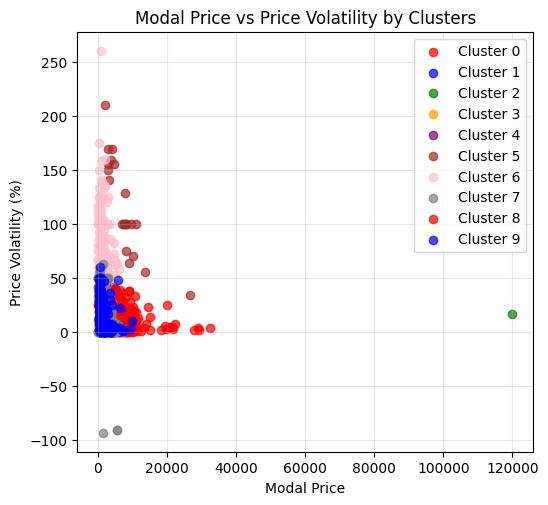

In [47]:
plt.figure(figsize=(20, 12))
# Price vs Volatility by clusters
plt.subplot(2, 3, 2)
for i in range(optimal_k):
    cluster_data = df[df['Market_Cluster'] == i]
    plt.scatter(cluster_data['Modal_Price'], cluster_data['Price_Volatility'],
               c=colors[i % len(colors)], label=f'Cluster {i}', alpha=0.7)
plt.xlabel('Modal Price')
plt.ylabel('Price Volatility (%)')
plt.title('Modal Price vs Price Volatility by Clusters')
plt.legend()
plt.grid(True, alpha=0.3)

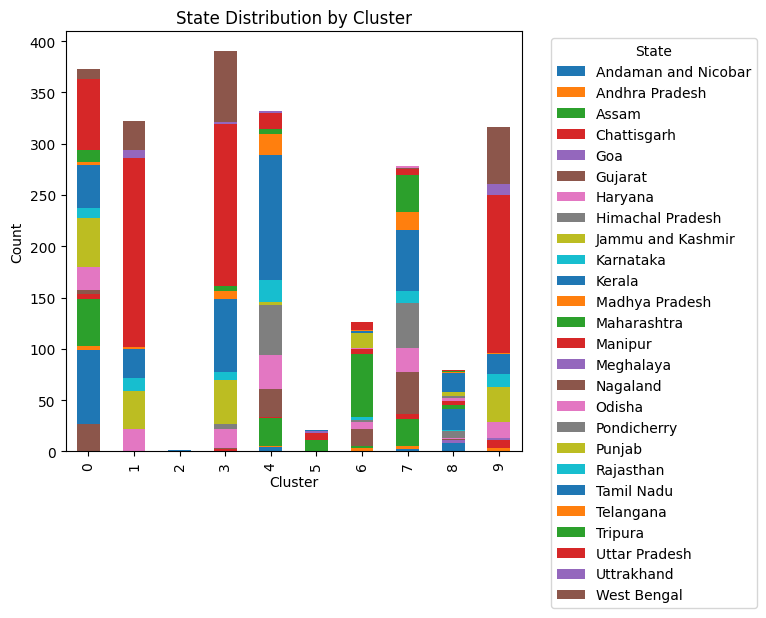

In [48]:
plt.figure(figsize=(20, 12))
# State distribution by cluster
plt.subplot(2, 3, 3)
cluster_state = pd.crosstab(df['Market_Cluster'], df['State'])
cluster_state.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('State Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

Text(0.5, 1.0, 'Price Distribution by Clusters')

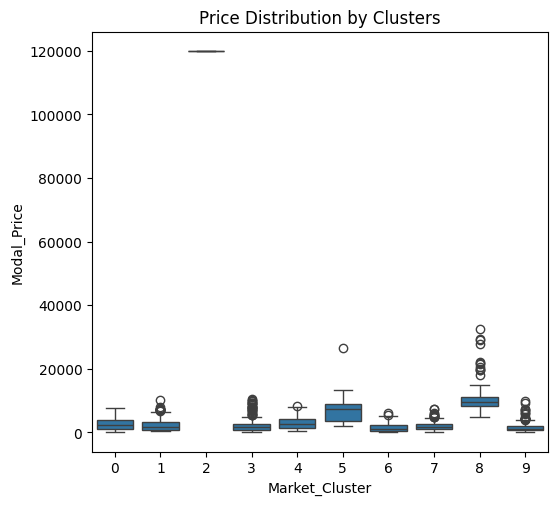

In [49]:
plt.figure(figsize=(20, 12))
# Price distribution by cluster
plt.subplot(2, 3, 4)
sns.boxplot(x='Market_Cluster', y='Modal_Price', data=df)
plt.title('Price Distribution by Clusters')

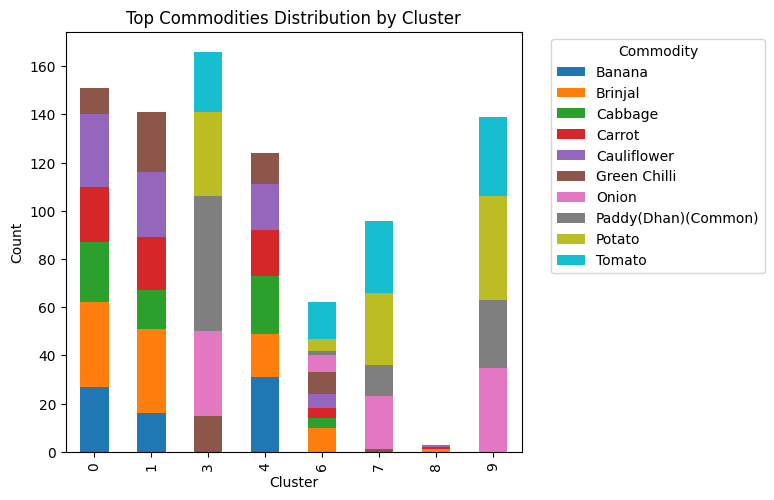

In [50]:
plt.figure(figsize=(20, 12))
# Commodity distribution by cluster (top commodities)
plt.subplot(2, 3, 5)
top_commodities = df['Commodity'].value_counts().head(10).index
cluster_commodity = pd.crosstab(df[df['Commodity'].isin(top_commodities)]['Market_Cluster'],
                               df[df['Commodity'].isin(top_commodities)]['Commodity'])
cluster_commodity.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Top Commodities Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')

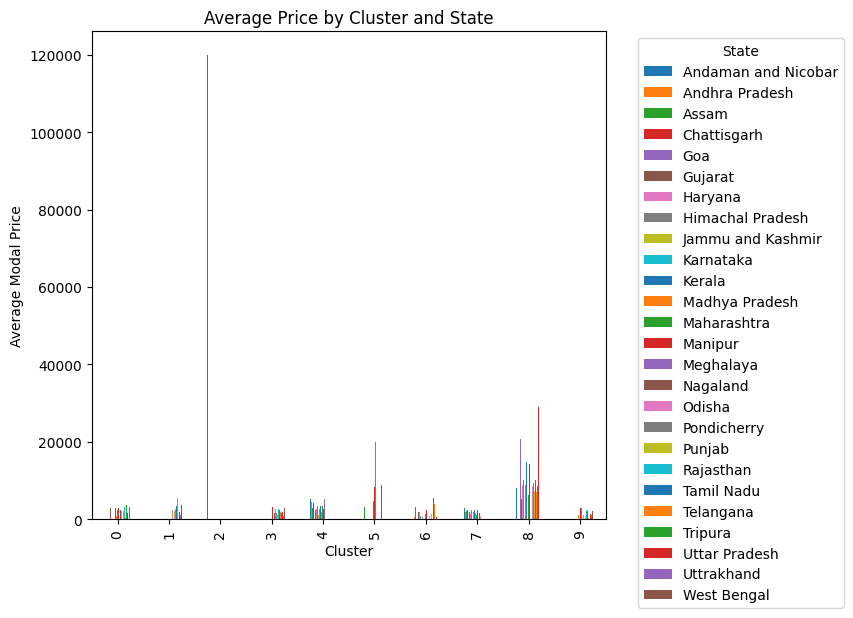

In [51]:
plt.figure(figsize=(20, 12))
# Average price by cluster and state
plt.subplot(2, 3, 6)
avg_price_cluster_state = df.groupby(['Market_Cluster', 'State'])['Modal_Price'].mean().unstack()
avg_price_cluster_state.plot(kind='bar', ax=plt.gca())
plt.title('Average Price by Cluster and State')
plt.xlabel('Cluster')
plt.ylabel('Average Modal Price')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [45]:
# ===== STRATEGIC RECOMMENDATIONS =====

print("\n" + "="*60)
print("STRATEGIC RECOMMENDATIONS FOR AGRICULTURAL MARKET")
print("="*60)

# Geographic market analysis
print("\nGEOGRAPHIC MARKET ANALYSIS:")
geo_analysis = df.groupby('State').agg({
    'Modal_Price': ['mean', 'std', 'count'],
    'Price_Volatility': 'mean'
}).round(2)
geo_analysis.columns = ['Avg_Price', 'Price_Std', 'Record_Count', 'Avg_Volatility']
geo_analysis = geo_analysis.sort_values('Avg_Price', ascending=False)
print(geo_analysis)

# High-value markets identification
high_value_states = geo_analysis[geo_analysis['Avg_Price'] > geo_analysis['Avg_Price'].quantile(0.75)]
print(f"\nHIGH-VALUE STATES (Top 25% by average price):")
print(high_value_states)

# Most stable markets (low volatility)
stable_markets = geo_analysis[geo_analysis['Avg_Volatility'] < geo_analysis['Avg_Volatility'].quantile(0.25)]
print(f"\nMOST STABLE MARKETS (Low volatility):")
print(stable_markets)

# Commodity-wise insights
print("\nCOMMODITY INSIGHTS:")
commodity_insights = df.groupby('Commodity').agg({
    'Modal_Price': ['mean', 'count'],
    'Price_Volatility': 'mean'
}).round(2)
commodity_insights.columns = ['Avg_Price', 'Record_Count', 'Avg_Volatility']
commodity_insights = commodity_insights.sort_values('Avg_Price', ascending=False)
print("Top 10 highest-priced commodities:")
print(commodity_insights.head(10))

print("\n" + "="*60)
print("MARKET ENTRY STRATEGY RECOMMENDATIONS:")
print("="*60)
print("1. HIGH-VALUE GEOGRAPHIC TARGETS:")
for state in high_value_states.index[:3]:
    print(f"   - {state}: Avg Price ₹{high_value_states.loc[state, 'Avg_Price']:.2f}")

print("\n2. STABLE MARKET OPPORTUNITIES:")
for state in stable_markets.index[:3]:
    print(f"   - {state}: Volatility {stable_markets.loc[state, 'Avg_Volatility']:.2f}%")

print("\n3. PRICING STRATEGY:")
print(f"   - Budget Segment: ≤ ₹{q1:.2f}")
print(f"   - Economy Segment: ₹{q1:.2f} - ₹{q2:.2f}")
print(f"   - Premium Segment: ₹{q2:.2f} - ₹{q3:.2f}")
print(f"   - Luxury Segment: ≥ ₹{q3:.2f}")

print("\n4. COMMODITY FOCUS:")
high_value_commodities = commodity_insights.head(5)
print("   Focus on high-value commodities:")
for commodity in high_value_commodities.index:
    print(f"   - {commodity}: Avg Price ₹{high_value_commodities.loc[commodity, 'Avg_Price']:.2f}")

print("\n" + "="*60)
print("CLUSTER-BASED MARKET SEGMENTS:")
print("="*60)
for cluster in range(optimal_k):
    cluster_data = df[df['Market_Cluster'] == cluster]
    print(f"\nCLUSTER {cluster} CHARACTERISTICS:")
    print(f"  Market Size: {len(cluster_data)} records")
    print(f"  Price Level: ₹{cluster_data['Modal_Price'].mean():.2f}")
    print(f"  Volatility: {cluster_data['Price_Volatility'].mean():.2f}%")
    print(f"  Primary States: {', '.join(cluster_data['State'].value_counts().head(3).index)}")
    print(f"  Top Commodities: {', '.join(cluster_data['Commodity'].value_counts().head(3).index)}")


STRATEGIC RECOMMENDATIONS FOR AGRICULTURAL MARKET

GEOGRAPHIC MARKET ANALYSIS:
                     Avg_Price  Price_Std  Record_Count  Avg_Volatility
State                                                                  
Goa                   20750.00    1391.94             3            5.58
Andaman and Nicobar   14073.33   29397.80            15           25.61
Meghalaya              9391.67    9305.40             6           28.52
Manipur                4391.83    3723.72            52           30.96
Pondicherry            3928.43    3818.43             7            1.43
Kerala                 3905.47    3933.24           274            9.51
Tamil Nadu             3870.14    2912.09           183           12.00
Tripura                3461.11    2524.56            18           24.52
Himachal Pradesh       3410.49    2875.92           102           10.79
West Bengal            2885.56    2273.73           162            8.77
Rajasthan              2796.51    1232.76            41 